## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [16]:

# Se importan las librerias a utilizar
import pandas as pd
from sklearn.dummy import DummyClassifier
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import mlflow.xgboost
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

In [17]:
##Configuraciones realizadas
set_config(print_changed_only=False)
seed = 42

### Lectura del dataset generado previamente

In [18]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,30_a_50,menor_2k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,C,P,1000,2,PROPIA,EDUCACIÓN,N,ACTIVO,M,SECUNDARIO_COMPLETO,3.0
1,15_a_30,menor_2k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,menor_5,menor_25,C,C,35000,2,ALQUILER,SALUD,N,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,15_a_30,menor_2k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,4,ALQUILER,SALUD,Y,ACTIVO,M,DESCONOCIDO,1.0
3,15_a_30,menor_2k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,N,C,2500,2,PROPIA,INVERSIONES,N,ACTIVO,F,SECUNDARIO_COMPLETO,4.0
4,15_a_30,menor_2k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,25_a_30,C,C,35000,3,ALQUILER,EDUCACIÓN,N,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,3.0


### Revisión de meta-datos

In [19]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

operaciones_ult_12m
gastos_ult_12m
limite_credito_tc
antiguedad_cliente
tasa_interes
ingresos
pct_ingreso
antiguedad_empleado
edad
estado_civil_N
estado_credito_N
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
estado_cliente
genero
nivel_educativo
personas_a_cargo

Cantidad de filas: 9765


### Armado de los sets de entrenamiento y testeo

In [20]:
# Se separan los atributos de datos de los de la etiqueta del dataset
labels = datos.falta_pago.values

features = datos[['operaciones_ult_12m','gastos_ult_12m','limite_credito_tc','antiguedad_cliente','tasa_interes','ingresos',
              'pct_ingreso','antiguedad_empleado','edad','estado_civil_N','estado_credito_N','importe_solicitado',
              'duracion_credito','situacion_vivienda','objetivo_credito','estado_cliente','genero','nivel_educativo',
              'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:5]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'N' 'Y' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,30_a_50,menor_2k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,C,P,1000,2,PROPIA,EDUCACIÓN,ACTIVO,M,SECUNDARIO_COMPLETO,3.0
1,15_a_30,menor_2k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,menor_5,menor_25,C,C,35000,2,ALQUILER,SALUD,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,15_a_30,menor_2k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,4,ALQUILER,SALUD,ACTIVO,M,DESCONOCIDO,1.0
3,15_a_30,menor_2k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,N,C,2500,2,PROPIA,INVERSIONES,ACTIVO,F,SECUNDARIO_COMPLETO,4.0
4,15_a_30,menor_2k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,25_a_30,C,C,35000,3,ALQUILER,EDUCACIÓN,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,3.0


In [21]:
# Se pasa a binarizar los atributos
data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,operaciones_ult_12m_menor_15,gastos_ult_12m_2k_a_4k,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,1000,2,3.0,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,35000,2,3.0,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,35000,4,1.0,True,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False
3,2500,2,4.0,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
4,35000,3,3.0,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True


In [22]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'
# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns
# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [23]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo
# Toma por defecto 75% (entrenamiento) - 25% (testeo)
# Vista de los datos de entrenamiento para una fila
train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila
print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          10800.0
duracion_credito                                2.0
personas_a_cargo                                3.0
operaciones_ult_12m_15_a_30                   False
operaciones_ult_12m_30_a_50                    True
                                             ...   
nivel_educativo_POSGRADO_COMPLETO             False
nivel_educativo_POSGRADO_INCOMPLETO           False
nivel_educativo_SECUNDARIO_COMPLETO           False
nivel_educativo_UNIVERSITARIO_COMPLETO         True
nivel_educativo_UNIVERSITARIO_INCOMPLETO      False
Name: 3279, Length: 65, dtype: object
--------------------------------------------------
Label del registro: 
N

##################################################
##################################################

Un registro de testeo: 
importe_solicitado                          30000.0
duracion_credito                                3.0
personas_a_cargo                                0.0
o

In [24]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels,X_train,y_train,cv=5):
    prediction = modelo.predict(test_data)
    scores = cross_val_score(modelo, X_train, y_train, cv=cv, scoring='accuracy')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    print(f'Puntajes de validación cruzada: {scores}')
    print('Rendimiento obtenido:',round(accuracy_score(test_labels,prediction),4))
    print(f'Validación cruzada: {round(scores.mean(),4)}')
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

### Generación de modelos sin optimizacion de parametros

#### ZeroR

In [25]:
clf = DummyClassifier()
clf.fit(train_data, train_labels)
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.814086814086814
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


----
Se pasa a configurar la serie de experimentos en **mlflow**

In [26]:
# Se establece un nombre para identificar la serie de experimentos
mlflow.set_experiment(experiment_name="Prueba #1")


<Experiment: artifact_location='file:///c:/Users/jonat/Desktop/maestria/gestion_proyectos/practica_2/13MBID_gestion_proyectos/notebooks/modelado_evaluacion/mlruns/292697136149324930', creation_time=1732465881851, experiment_id='292697136149324930', last_update_time=1732465881851, lifecycle_stage='active', name='Prueba #1', tags={}>

#### Regresión Logística

2024/11/26 19:58:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Puntajes de validación cruzada: [0.85938567 0.86279863 0.86552901 0.87090164 0.87909836]
Rendimiento obtenido: 0.8681
Validación cruzada: 0.8675
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.95      0.92      1988
           Y       0.69      0.52      0.60       454

    accuracy                           0.87      2442
   macro avg       0.79      0.74      0.76      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


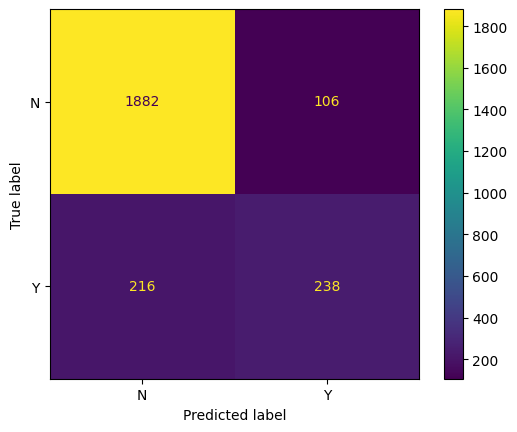

In [27]:
mlflow.autolog()
with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear')
    lreg.fit(train_data, train_labels)
    
# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)
evaluar_modelo(lreg, test_data, test_labels,X_train=train_data, y_train=train_labels)

#### KNN

2024/11/26 19:58:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Puntajes de validación cruzada: [0.82730375 0.82662116 0.82525597 0.82718579 0.82718579]
Rendimiento obtenido: 0.8153
Validación cruzada: 0.8267
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.82      1.00      0.90      1988
           Y       0.71      0.01      0.02       454

    accuracy                           0.82      2442
   macro avg       0.76      0.51      0.46      2442
weighted avg       0.80      0.82      0.74      2442

Matriz de confusión:


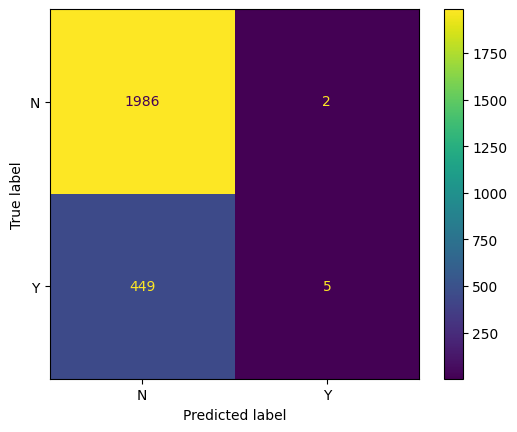

In [28]:
# Volver a habilitar el autologging
mlflow.autolog()
with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)
    
# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)
evaluar_modelo(knn, test_data, test_labels,X_train=train_data, y_train=train_labels)

#### Árboles de Decisión (TDIDT)

2024/11/26 19:58:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Puntajes de validación cruzada: [0.87235495 0.8894198  0.87440273 0.88046448 0.88114754]
Rendimiento obtenido: 0.88
Validación cruzada: 0.8796
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.94      0.93      1988
           Y       0.71      0.61      0.65       454

    accuracy                           0.88      2442
   macro avg       0.81      0.77      0.79      2442
weighted avg       0.87      0.88      0.88      2442

Matriz de confusión:


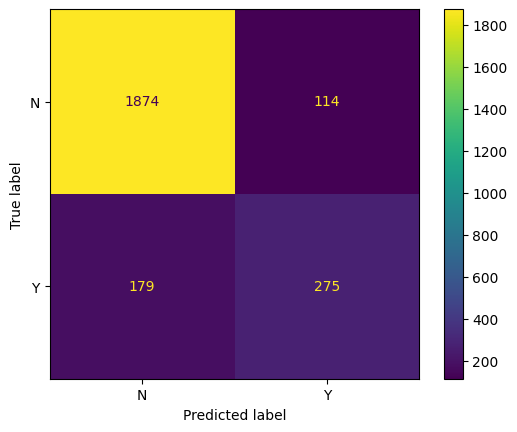

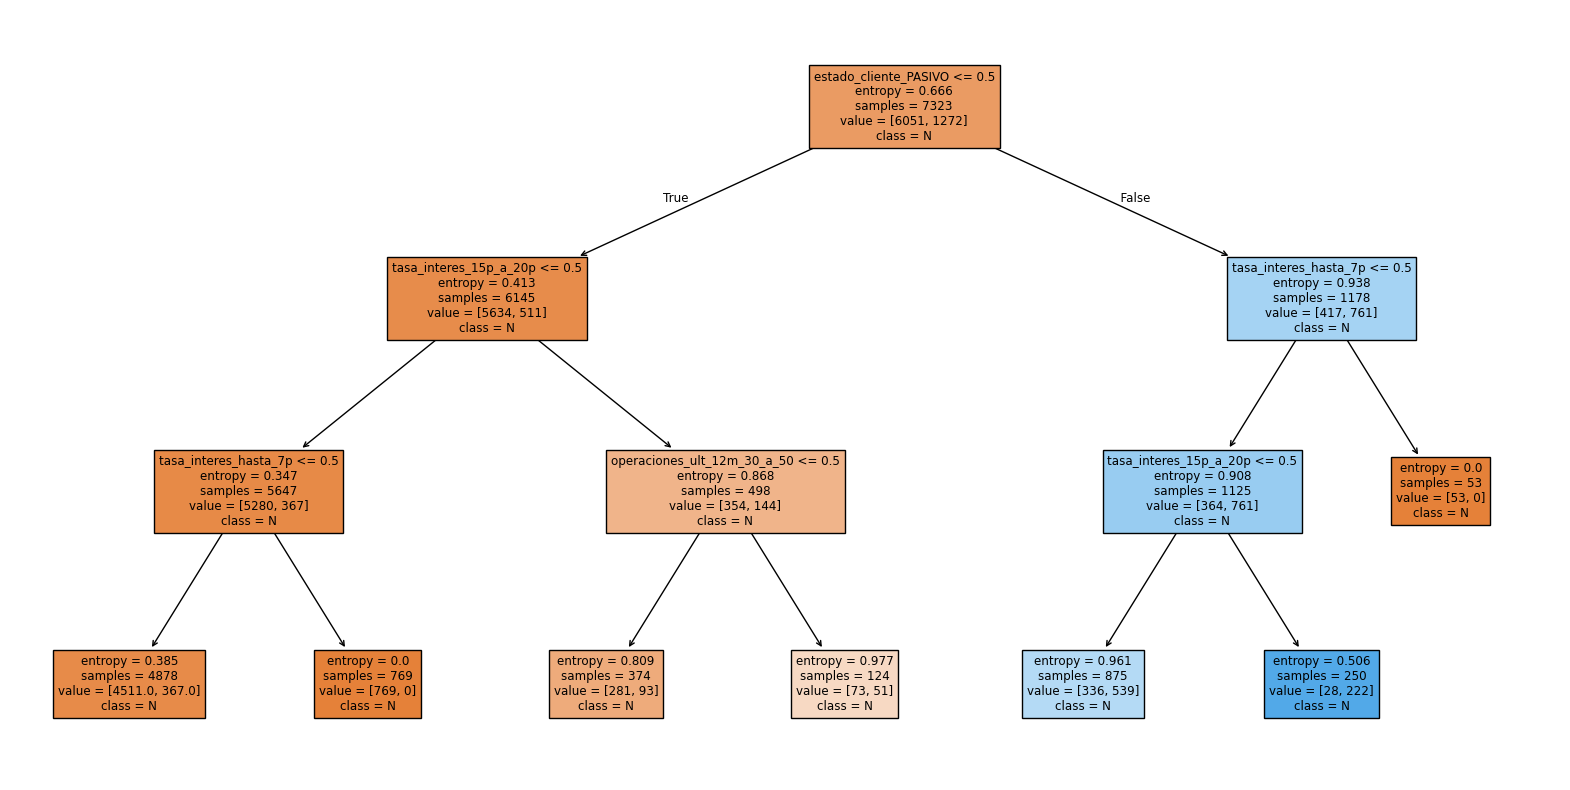

In [29]:
# Volver a habilitar el autologging
mlflow.autolog()
with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)
evaluar_modelo(dtc, test_data, test_labels,X_train=train_data, y_train=train_labels)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

#### SVM

2024/11/26 19:59:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Puntajes de validación cruzada: [0.82662116 0.82593857 0.82593857 0.82650273 0.82650273]
Rendimiento obtenido: 0.8141
Validación cruzada: 0.8263
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.81      1.00      0.90      1988
           Y       0.00      0.00      0.00       454

    accuracy                           0.81      2442
   macro avg       0.41      0.50      0.45      2442
weighted avg       0.66      0.81      0.73      2442

Matriz de confusión:


c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in la

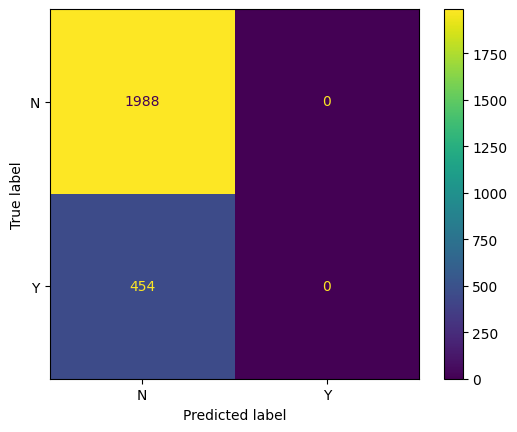

In [30]:


# Volver a habilitar el autologging
mlflow.autolog()
with mlflow.start_run(run_name='Support Vector Machines'):
    svm_model = SVC(kernel='rbf', C=1, gamma='scale')
    svm_model.fit(train_data, train_labels)

# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)
evaluar_modelo(svm_model, test_data, test_labels,X_train=train_data, y_train=train_labels)

#### Métodos de ensamblado de modelos: RandomForest

2024/11/26 19:59:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Puntajes de validación cruzada: [0.86962457 0.88464164 0.87645051 0.87568306 0.87636612]
Rendimiento obtenido: 0.8698
Validación cruzada: 0.8766
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.96      0.92      1988
           Y       0.73      0.47      0.57       454

    accuracy                           0.87      2442
   macro avg       0.81      0.72      0.75      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


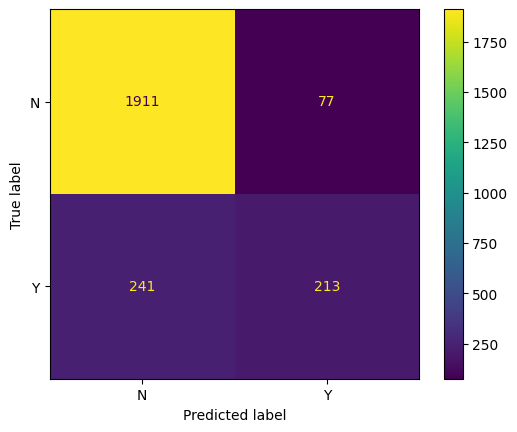

In [31]:
# Volver a habilitar el autologging
mlflow.autolog()
with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10)
    rndf.fit(train_data, train_labels)

# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)   
evaluar_modelo(rndf, test_data, test_labels,X_train=train_data, y_train=train_labels)

#### Métodos de ensamblado de modelos: XGBClassifier

In [32]:
# Volver a habilitar el autologging
le = LabelEncoder()
train_labels_encoder = le.fit_transform(train_labels)
test_labels_encoder = le.transform(test_labels)
print('Las clases fueron mapeadas en este orden: ',le.classes_)

Las clases fueron mapeadas en este orden:  ['N' 'Y']


2024/11/26 20:00:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:00:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Puntajes de validación cruzada: [0.87167235 0.88259386 0.86348123 0.8715847  0.88046448]
Rendimiento o

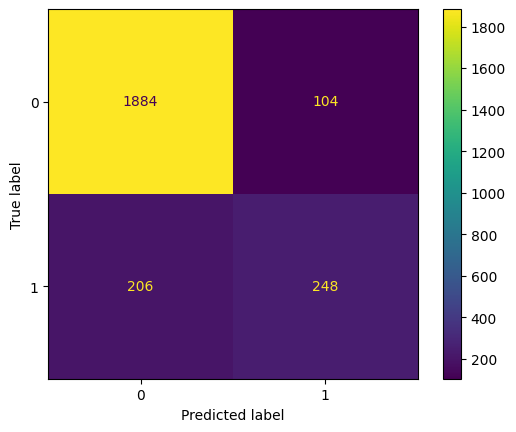

In [33]:
# Habilitar autologging de XGBoost
mlflow.xgboost.autolog()
with mlflow.start_run(run_name='XGBClassifier') as run:
   # Entrenar el modelo
    xgb = XGBClassifier(objective='binary:logistic', random_state=seed)
    xgb.fit(train_data, train_labels_encoder)
    model_params = xgb.get_params()
    print(model_params)
    mlflow.log_params(model_params)
    # Predicciones sobre el conjunto de entrenamiento
    train_predictions = xgb.predict(train_data)
    # Calcular las métricas
    training_accuracy = accuracy_score(train_labels_encoder, train_predictions)
    training_f1 = f1_score(train_labels_encoder, train_predictions)
    training_recall = recall_score(train_labels_encoder, train_predictions)
    training_roc_auc = roc_auc_score(train_labels_encoder, xgb.predict_proba(train_data)[:, 1])
    
    # Registrar las métricas en MLflow
    mlflow.log_metric("training_accuracy_score", training_accuracy)
    mlflow.log_metric("training_f1_score", training_f1)
    mlflow.log_metric("training_recall_score", training_recall)
    mlflow.log_metric("training_roc_auc", training_roc_auc)
    

# Deshabilitar autologging temporalmente
mlflow.xgboost.autolog(disable=True)
evaluar_modelo(xgb, test_data, test_labels_encoder,X_train=train_data, y_train=train_labels_encoder)

----
Prueba #2

Dados los resultados anteriores se realiza una optimización de los hyperparametros de los modelos para realizar una siguiente evaluación de los resultados de los modelos

In [197]:
# Se establece un nombre para identificar la serie de experimentos
mlflow.set_experiment(experiment_name="Prueba #2")

<Experiment: artifact_location='file:///c:/Users/jonat/Desktop/maestria/gestion_proyectos/practica_2/13MBID_gestion_proyectos/notebooks/modelado_evaluacion/mlruns/559744408320407461', creation_time=1732586689908, experiment_id='559744408320407461', last_update_time=1732586689908, lifecycle_stage='active', name='Prueba #2', tags={}>

#### Regresión Logística

In [198]:
# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)   
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Hiperparámetros para explorar
random_grid = {
    'C': uniform(loc=0, scale=10),  # Regularización inversa
    'solver': ['liblinear', 'saga'],  # Solvers compatibles con las penalizaciones seleccionadas
    'l1_ratio': [0.1, 0.5, 0.9]  # Balance entre L1 y L2
}
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=random_grid,
    n_iter=100, 
    scoring='accuracy',
    cv=5,  # Validación cruzada de 5 pliegues
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Ejecutar RandomizedSearchCV
random_search.fit(train_data, train_labels)

best_params = random_search.best_params_

# Resultados de la búsqueda
print("Mejores parámetros encontrados por RandomizedSearchCV:")
print(best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros encontrados por RandomizedSearchCV:
{'C': np.float64(2.848404943774676), 'l1_ratio': 0.1, 'solver': 'liblinear'}


c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [199]:
# Ajustar rangos para GridSearch
param_grid = {
    'C': [best_params['C'] * 0.1, best_params['C'], best_params['C'] * 10],
    'solver': [best_params['solver']],
    'l1_ratio':[best_params['l1_ratio']]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Ejecutar GridSearchCV
grid_search.fit(train_data, train_labels)

# Resultados de la búsqueda
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores parámetros encontrados por GridSearchCV:
{'C': np.float64(2.848404943774676), 'l1_ratio': 0.1, 'solver': 'liblinear'}


c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


2024/11/25 23:46:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\sklearn\linear_mod

Puntajes de validación cruzada: [0.85938567 0.8668942  0.87576792 0.88797814 0.8647541 ]
Rendimiento obtenido: 0.8714
Validación cruzada: 0.871
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.95      0.92      2014
           Y       0.68      0.51      0.58       428

    accuracy                           0.87      2442
   macro avg       0.79      0.73      0.75      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


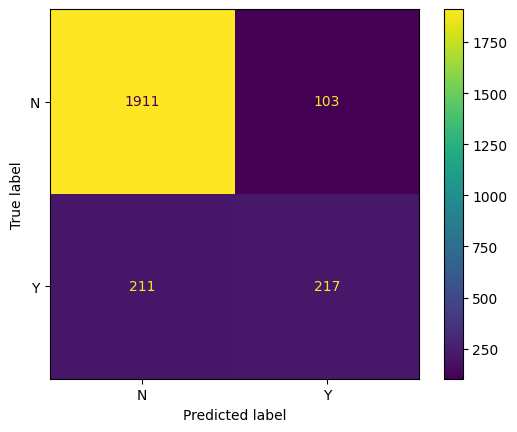

In [200]:
mlflow.autolog()
with mlflow.start_run(run_name='Logistic Regression #2'):
    lreg = LogisticRegression(**grid_search.best_params_)
    lreg.fit(train_data, train_labels)
    
# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)
evaluar_modelo(lreg, test_data, test_labels,X_train=train_data, y_train=train_labels)

#### KNN

In [201]:
# Hiperparámetros para explorar
random_grid_knn = {
    'n_neighbors': randint(1, 30),  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Pesos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmos
    'p': [1, 2],  # Distancias: 1=Manhattan, 2=Euclidiana
    'leaf_size': randint(20, 60),  # Tamaño de hojas para 'ball_tree' y 'kd_tree'
}

# Modelo KNN
knn = KNeighborsClassifier()

# RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=random_grid_knn,
    n_iter=100,  # Número de combinaciones a probar
    scoring='accuracy',  # Métrica de evaluación
    cv=5,  # Validación cruzada
    verbose=2,
    n_jobs=-1,  # Paralelización
    random_state=42
)

# Ajustar modelo
random_search_knn.fit(train_data, train_labels)

# Resultados
print("Mejores parámetros encontrados por RandomizedSearchCV para KNN:")
print(random_search_knn.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros encontrados por RandomizedSearchCV para KNN:
{'algorithm': 'ball_tree', 'leaf_size': 22, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [202]:
# Hiperparámetros para explorar (con los mejores parámetros encontrados en el RandomizedSearchCV)
grid_search_knn = {
    'n_neighbors': [random_search_knn.best_params_['n_neighbors'] - 1, random_search_knn.best_params_['n_neighbors'], random_search_knn.best_params_['n_neighbors'] + 1],  # Ajustar alrededor del mejor valor encontrado
    'weights': ['uniform', 'distance'],
    'algorithm': [random_search_knn.best_params_['algorithm']],
    'p': [1, 2],
    'leaf_size': [random_search_knn.best_params_['leaf_size'] - 10, random_search_knn.best_params_['leaf_size'], random_search_knn.best_params_['leaf_size'] + 10],
}

# GridSearchCV
grid_search_knn = GridSearchCV(
    knn,
    param_grid=grid_search_knn,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1  # Paralelización
)

# Ajustar modelo
grid_search_knn.fit(train_data, train_labels)

best_params_knn = grid_search_knn.best_params_
# Resultados
print("Mejores parámetros encontrados por GridSearchCV para KNN:")
print(best_params_knn)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros encontrados por GridSearchCV para KNN:
{'algorithm': 'ball_tree', 'leaf_size': 12, 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


2024/11/25 23:46:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Puntajes de validación cruzada: [0.84232082 0.84505119 0.84846416 0.83333333 0.83674863]
Rendimiento obtenido: 0.8387
Validación cruzada: 0.8412
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.86      0.97      0.91      2014
           Y       0.60      0.24      0.34       428

    accuracy                           0.84      2442
   macro avg       0.73      0.60      0.62      2442
weighted avg       0.81      0.84      0.81      2442

Matriz de confusión:


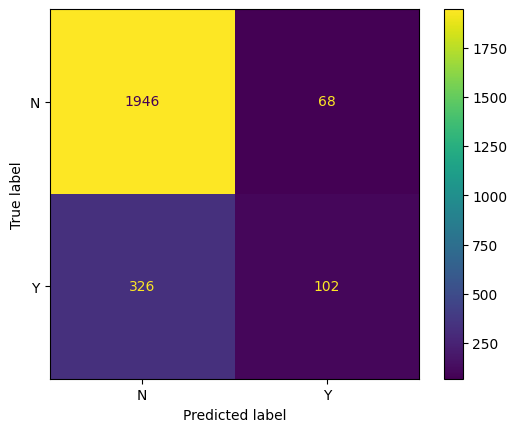

In [203]:
# Volver a habilitar el autologging
mlflow.autolog()
with mlflow.start_run(run_name='KNN #2'):
    knn = KNeighborsClassifier(**best_params_knn)
    knn.fit(train_data, train_labels)
    
# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)
evaluar_modelo(knn, test_data, test_labels,X_train=train_data, y_train=train_labels)

#### Árboles de Decisión (TDIDT)

In [204]:
dt = DecisionTreeClassifier(random_state=seed)
# Definir los parámetros para RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 20),  # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 20),  # Mínimo número de muestras para estar en una hoja
    'max_features': ['sqrt', 'log2', None],  # Cambié 'auto' a 'sqrt', 'log2' o None
    'criterion': ['gini', 'entropy']  # Función de calidad de división
}
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Ejecutar RandomizedSearchCV
random_search.fit(train_data, train_labels)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros de RandomizedSearchCV: {random_search.best_params_}")


Mejores parámetros de RandomizedSearchCV: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 19, 'min_samples_split': 3}


In [205]:
# Definir una malla más precisa para GridSearchCV
param_grid = {
    'max_depth': [random_search.best_params_['max_depth'] - 1, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 1],
    'min_samples_split': [random_search.best_params_['min_samples_split'] - 1, random_search.best_params_['min_samples_split'], random_search.best_params_['min_samples_split'] + 1],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf'] - 1, random_search.best_params_['min_samples_leaf'], random_search.best_params_['min_samples_leaf'] + 1],
    'max_features': [random_search.best_params_['max_features']],  # Mantener este parámetro como está
    'criterion': [random_search.best_params_['criterion']]  # Mantener este parámetro como está
}

# Configurar GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid=param_grid, cv=5)

# Ejecutar GridSearchCV
grid_search_dt.fit(train_data, train_labels)

# Mostrar los mejores parámetros encontrados con GridSearchCV
print(f"Mejores parámetros de GridSearchCV: {grid_search_dt.best_params_}")


Mejores parámetros de GridSearchCV: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 18, 'min_samples_split': 2}


2024/11/25 23:47:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Puntajes de validación cruzada: [0.87440273 0.8778157  0.88600683 0.8852459  0.88387978]
Rendimiento obtenido: 0.8808
Validación cruzada: 0.8815
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.96      0.93      2014
           Y       0.72      0.52      0.61       428

    accuracy                           0.88      2442
   macro avg       0.81      0.74      0.77      2442
weighted avg       0.87      0.88      0.87      2442

Matriz de confusión:


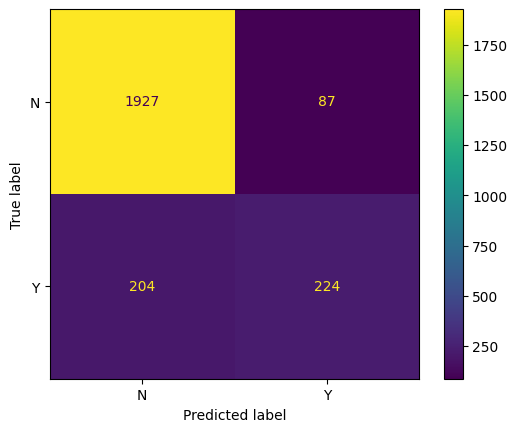

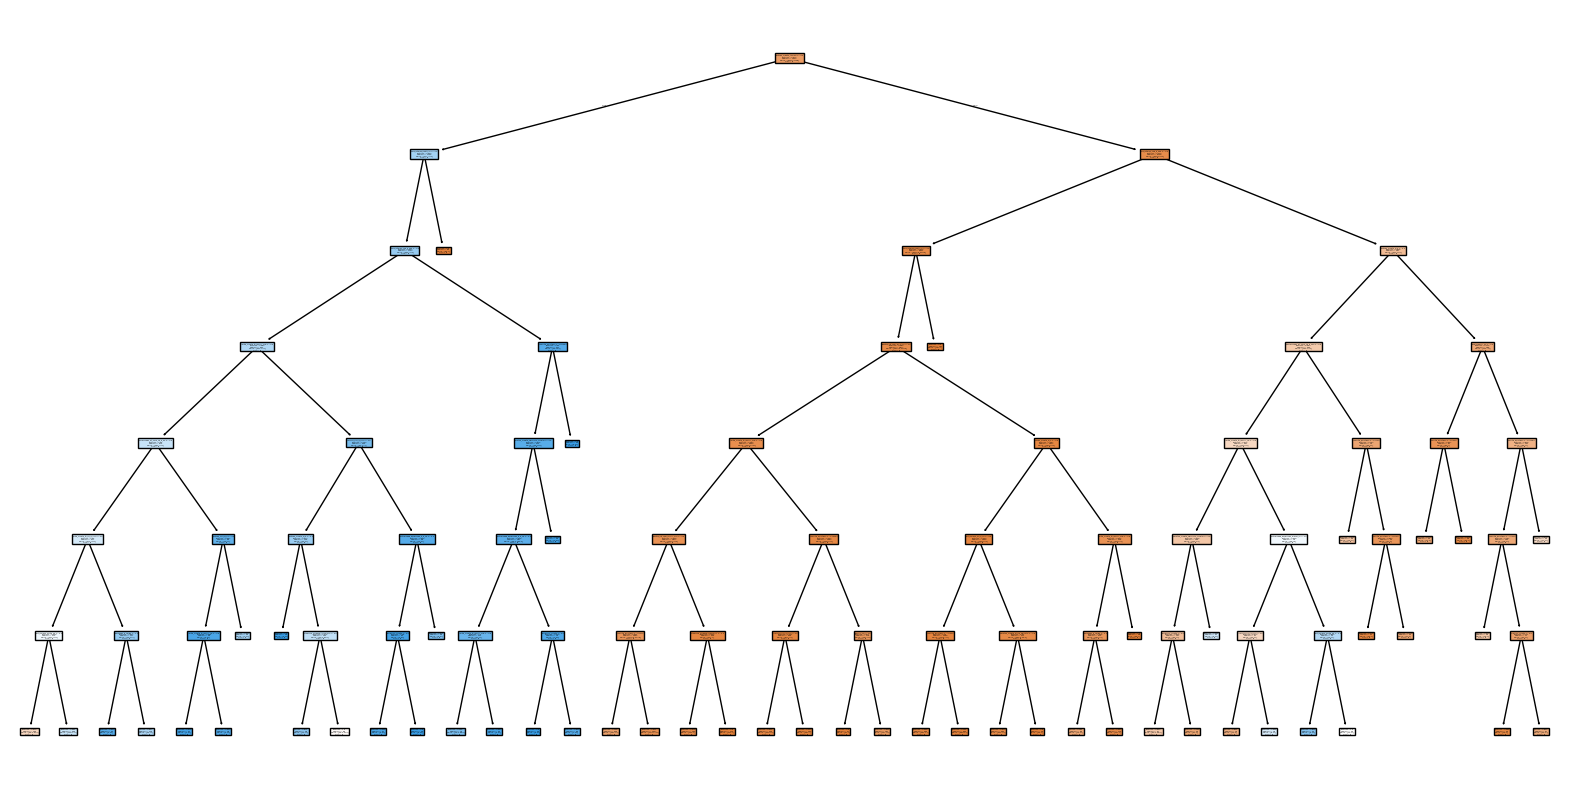

In [206]:
# Volver a habilitar el autologging
mlflow.autolog()
with mlflow.start_run(run_name='Decision Tree #2'):
    dtc = DecisionTreeClassifier(**grid_search_dt.best_params_)
    dtc.fit(train_data, train_labels)

# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)
evaluar_modelo(dtc, test_data, test_labels,X_train=train_data, y_train=train_labels)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

#### Métodos de ensamblado de modelos: RandomForest

In [207]:
rf = RandomForestClassifier(random_state=seed)

# Rango de hiperparámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(10, 110, 20).tolist() + [None],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=seed,
    n_jobs=-1
)

# Ajusta RandomizedSearchCV en el conjunto de entrenamiento
random_search.fit(train_data, train_labels)

# Mejor estimador del RandomizedSearchCV
print("Mejores hiperparámetros de RandomizedSearchCV:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros de RandomizedSearchCV: {'n_estimators': np.int64(50), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(2), 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [208]:
# Mejores parámetros encontrados con RandomizedSearchCV
best_params = random_search.best_params_

# Ajustamos el rango de valores para la búsqueda exhaustiva
param_grid = {
    'n_estimators': [
        max(best_params['n_estimators'] - 10, 10),
        best_params['n_estimators'],
        best_params['n_estimators'] + 10,
        best_params['n_estimators'] + 20,
        best_params['n_estimators'] - 20
    ],
    'max_features': [best_params['max_features']],
    'max_depth': [
        max(best_params['max_depth'] - 10, 1) if best_params['max_depth'] is not None else None,  # mínimo 1
        best_params['max_depth'],
        best_params['max_depth'] + 10 if best_params['max_depth'] is not None else None
    ],
    'min_samples_split': [
        max(best_params['min_samples_split'] - 1, 2),
        best_params['min_samples_split'],
        best_params['min_samples_split'] + 1
    ],
    'min_samples_leaf': [
        max(best_params['min_samples_leaf'] - 1, 1),
        best_params['min_samples_leaf'],
        best_params['min_samples_leaf'] + 1
    ],
    'bootstrap': [best_params['bootstrap']]
}

# GridSearchCV para una búsqueda exhaustiva
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Ajusta GridSearchCV en el conjunto de entrenamiento
grid_search_rf.fit(train_data, train_labels)

# Mejores hiperparámetros de GridSearchCV
print("Mejores hiperparámetros de GridSearchCV:", grid_search_rf.best_params_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Mejores hiperparámetros de GridSearchCV: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(7), 'n_estimators': np.int64(30)}


c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


2024/11/25 23:49:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Puntajes de validación cruzada: [0.87303754 0.87986348 0.89146758 0.88934426 0.8784153 ]
Rendimiento obtenido: 0.889
Validación cruzada: 0.8824
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.96      0.93      2014
           Y       0.75      0.56      0.64       428

    accuracy                           0.89      2442
   macro avg       0.83      0.76      0.79      2442
weighted avg       0.88      0.89      0.88      2442

Matriz de confusión:


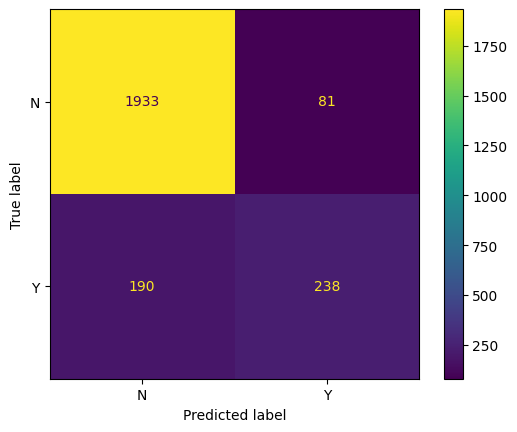

In [209]:
# Volver a habilitar el autologging
mlflow.autolog()
with mlflow.start_run(run_name='Random Forest #2'):
    rndf = RandomForestClassifier(**grid_search_rf.best_params_)
    rndf.fit(train_data, train_labels)

# Deshabilitar temporalmente el autologging
mlflow.autolog(disable=True)   
evaluar_modelo(rndf, test_data, test_labels,X_train=train_data, y_train=train_labels)

#### Métodos de ensamblado de modelos: XGBClassifier

In [34]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

# Modelo base
xgb = XGBClassifier(objective='binary:logistic', random_state=seed)
# RandomizedSearchCV para explorar el espacio amplio de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=seed,
    n_jobs=-1
)

# Entrenamiento de RandomizedSearchCV
random_search.fit(train_data, train_labels_encoder)

# Guardamos los mejores parámetros encontrados
best_random_params = random_search.best_params_
print("Mejores hiperparámetros de RandomizedSearchCV:", best_random_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros de RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [35]:
param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 50,
                     best_random_params['n_estimators'],
                     best_random_params['n_estimators'] + 50],
    'max_depth': [best_random_params['max_depth'] - 1,
                  best_random_params['max_depth'],
                  best_random_params['max_depth'] + 1],
    'learning_rate': [best_random_params['learning_rate'] * 0.5,
                      best_random_params['learning_rate'],
                      best_random_params['learning_rate'] * 1.5],
    'subsample': [best_random_params['subsample'] - 0.1,
                  best_random_params['subsample'],
                  best_random_params['subsample'] - 0.2],
    'colsample_bytree': [best_random_params['colsample_bytree'] - 0.1,
                         best_random_params['colsample_bytree']],
    'gamma': [best_random_params['gamma'] - 0.05,
              best_random_params['gamma'],
              best_random_params['gamma'] + 0.05],
    'min_child_weight': [best_random_params['min_child_weight'] - 1,
                         best_random_params['min_child_weight'],
                         best_random_params['min_child_weight'] + 1]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(train_data, train_labels_encoder)

best_params = grid_search.best_params_
best_model_xgbost = grid_search.best_estimator_

print("Mejores hiperparámetros de GridSearchCV:", best_params)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Mejores hiperparámetros de GridSearchCV: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.015, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.6000000000000001}


2024/11/26 20:20:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\jonat\Desktop\maestria\gestion_proyectos\practica_2\13MBID_gestion_proyectos\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.015, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': 4, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.6000000000000001, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Puntajes de validación cruzada: [0.88737201 0.89419795 0.87508532 0.88046448 0.8852459 ]
Rendi

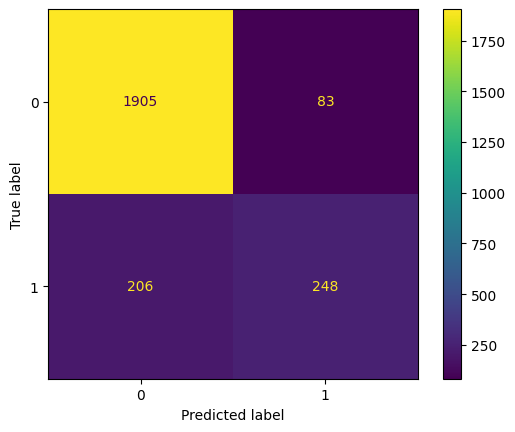

In [37]:
mlflow.xgboost.autolog() 
with mlflow.start_run(run_name='XGBClassifier #2'):
    xgb = XGBClassifier(**best_params)
    xgb.fit(train_data, train_labels_encoder)
    model_params = xgb.get_params()
    print(model_params)
    mlflow.log_params(model_params)
    # Predicciones sobre el conjunto de entrenamiento
    train_predictions = xgb.predict(train_data)
    # Calcular las métricas
    training_accuracy = accuracy_score(train_labels_encoder, train_predictions)
    training_f1 = f1_score(train_labels_encoder, train_predictions)
    training_recall = recall_score(train_labels_encoder, train_predictions)
    training_roc_auc = roc_auc_score(train_labels_encoder, xgb.predict_proba(train_data)[:, 1])
    
    # Registrar las métricas en MLflow
    mlflow.log_metric("training_accuracy_score", training_accuracy)
    mlflow.log_metric("training_f1_score", training_f1)
    mlflow.log_metric("training_recall_score", training_recall)
    mlflow.log_metric("training_roc_auc", training_roc_auc)

# Deshabilitar temporalmente el autologging
mlflow.xgboost.autolog(disable=True)
evaluar_modelo(xgb, test_data, test_labels_encoder,X_train=train_data, y_train=train_labels_encoder)

----

### Prueba de despliegue (utilzando datos nuevos)

In [43]:
datos_nuevos = pd.read_csv('../../data/final/datos_nuevos.csv', sep=';')
datos_nuevos.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [44]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0: 'C',
    1 : 'P',
}

estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# df_final = pd.concat([estado_civil_N, estado_credito_N, df_integrado], axis=1)
# df_final.head()

# Antiguedad del empleado

etiquetas_a_e = ['menor_5', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(datos_nuevos['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=True).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(datos_nuevos['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_2k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 1999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

# operaciones_ult_12m_N.value_counts()

col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'nivel_tarjeta',
              'estado_civil',
              'estado_credito',
              'id_cliente']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


df_nuevo = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, estado_civil_N, estado_credito_N, datos_nuevos], axis=1)
df_nuevo.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,menor_5,menor_25,S,C,4000,4,HIPOTECA,PERSONAL,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,1.0
1,75_a_100,2k_a_4k,menor_3k,menor_2y,7p_a_15p,mayor_100k,hasta_20,menor_5,25_a_30,C,C,10000,2,ALQUILER,INVERSIONES,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,50_a_75,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,20k_a_50k,hasta_20,menor_5,menor_25,C,C,1700,2,HIPOTECA,SALUD,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,1.0
3,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,NA,25_a_30,C,C,7200,4,ALQUILER,PAGO_DEUDAS,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,5_a_10,25_a_30,C,C,5000,3,HIPOTECA,PAGO_DEUDAS,ACTIVO,F,SECUNDARIO_COMPLETO,1.0


In [45]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   importe_solicitado                        112 non-null    int64  
 1   duracion_credito                          112 non-null    int64  
 2   personas_a_cargo                          112 non-null    float64
 3   operaciones_ult_12m_menor_15              112 non-null    bool   
 4   operaciones_ult_12m_15_a_30               112 non-null    bool   
 5   operaciones_ult_12m_30_a_50               112 non-null    bool   
 6   operaciones_ult_12m_50_a_75               112 non-null    bool   
 7   operaciones_ult_12m_75_a_100              112 non-null    bool   
 8   operaciones_ult_12m_mayor_100             112 non-null    bool   
 9   gastos_ult_12m_menor_2k                   112 non-null    bool   
 10  gastos_ult_12m_2k_a_4k                

In [46]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

{'estado_civil_N_C',
 'estado_civil_N_D',
 'estado_civil_N_N',
 'estado_civil_N_S',
 'estado_credito_N_C',
 'estado_credito_N_P',
 'situacion_vivienda_OTROS'}

Datos nuevos: 72
Datos entrenamiento: 65
set()


In [47]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['importe_solicitado', 'duracion_credito', 'personas_a_cargo',
       'operaciones_ult_12m_15_a_30', 'operaciones_ult_12m_30_a_50',
       'operaciones_ult_12m_50_a_75', 'operaciones_ult_12m_75_a_100',
       'operaciones_ult_12m_mayor_100', 'operaciones_ult_12m_menor_15',
       'gastos_ult_12m_2k_a_4k', 'gastos_ult_12m_4k_a_6k',
       'gastos_ult_12m_6k_a_8k', 'gastos_ult_12m_8k_a_10k',
       'gastos_ult_12m_mayor_10k', 'gastos_ult_12m_menor_2k',
       'limite_credito_tc_3k_a_5k', 'limite_credito_tc_5k_a_10k',
       'limite_credito_tc_mayor_10k', 'limite_credito_tc_menor_3k',
       'antiguedad_cliente_2y_a_4y', 'antiguedad_cliente_mayor_4y',
       'antiguedad_cliente_menor_2y', 'tasa_interes_15p_a_20p',
       'tasa_interes_7p_a_15p', 'tasa_interes_hasta_7p',
       'tasa_interes_mayor_20p', 'ingresos_20k_a_50k', 'ingresos_50k_a_100k',
       'ingresos_hasta_20k', 'ingresos_mayor_100k', 'pct_ingreso_20_a_40',
       'pct_ingreso_40_a_60', 'pct_ingreso_hasta_20', 'pct_ingr

In [48]:
# Se hace la predicción con los nuevos datos empleando el modelo Random Forest
prediccion_nuevos = rndf.predict(nuevos_codif)
prediccionDF = pd.DataFrame(prediccion_nuevos)

In [49]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()

prediccion_mora
N    90
Y    22
Name: count, dtype: int64